## Importing libraries

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.impute import SimpleImputer

## Loading .arff type files

In [3]:
df = arff.loadarff('2year.arff')
df = pd.DataFrame(df[0])

In [4]:
df.sample(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
9297,0.087016,0.25141,0.474600,4.6279,65.64400,0.00000,0.087016,2.9776,1.4973,0.74859,...,0.24693,0.116240,0.75927,0.047821,6.6917,5.6815,31.891,11.4450,3.7946,b'0'
5795,0.036654,0.41362,0.349390,2.0020,112.69000,0.00000,0.036654,1.4176,1.7785,0.58638,...,0.52020,0.062509,0.48575,0.000000,6.0604,4.7545,71.566,5.1002,5.8908,b'0'
1658,0.242720,0.24218,0.407280,3.0587,-114.64000,0.00000,0.242720,3.1292,1.8739,0.75782,...,0.87458,0.320280,0.13453,0.009118,14.0200,7.1925,38.536,9.4718,4.7454,b'0'
1532,0.039848,0.75069,0.028413,1.0537,-89.46200,0.00000,0.066008,0.3321,1.3319,0.24931,...,0.11225,0.159830,0.95217,0.887420,4.3583,5.6948,145.090,2.5157,3.0137,b'0'
7266,0.039346,0.31444,0.178670,1.5682,0.98675,0.15275,0.050833,1.8888,1.0147,0.59391,...,0.01452,0.066249,0.98548,0.000000,19.3420,67.2030,34.953,10.4430,6.4781,b'0'


## Renaming input and target variable

In [5]:
# Rename input columns to X(n) format
input_columns = df.columns[:-1]  # Exclude the last column (target column)
renamed_input_columns = [f"X({n})" for n in range(1, len(input_columns) + 1)]
df.rename(columns=dict(zip(input_columns, renamed_input_columns)), inplace=True)

# Rename target column to 'Y'
df.rename(columns={'class': 'Y'}, inplace=True)

In [6]:
df.sample(5)

,X(1),X(2),X(3),X(4),X(5),X(6),X(7),X(8),X(9),X(10),...,X(56),X(57),X(58),X(59),X(60),X(61),X(62),X(63),X(64),Y
6763,1.31980,0.10822,0.026913,1.2487,5.5674,3.33200,1.31980,8.24020,1.7365,0.89178,...,0.424140,1.47990,0.57586,0.00000,NaN,23.5180,12.699,28.7410,3.5965,b'0'
1365,0.22653,0.59402,0.218420,1.3677,6.3563,0.00000,0.27977,0.68345,3.1940,0.40598,...,0.088795,0.55799,0.91261,0.00000,NaN,5.2445,67.883,5.3769,17.0290,b'0'
2285,0.15305,0.25825,0.574180,3.3522,-2.1166,0.00000,0.19076,2.87220,2.1739,0.74175,...,0.074249,0.20634,0.91469,0.00000,11.6690,12.8220,40.986,8.9055,11.9630,b'0'
5289,0.18668,0.53811,0.128420,1.3945,-36.9400,0.25516,0.18668,0.70901,1.2333,0.38153,...,0.189140,0.48930,0.81086,0.55724,4.7743,5.1587,126.090,2.8949,1.7256,b'0'
1594,0.51713,0.54354,0.217840,1.4508,-78.9000,0.51713,0.51713,0.83947,1.3921,0.45628,...,0.281650,1.13330,0.71835,0.13222,3.6686,15.6820,96.556,3.7802,6.1100,b'0'


## Understanding the data

In [7]:
# Get the shape (no of rows & columns) in our dataset

df.shape

(10173, 65)

In [8]:
# Understanding Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10173 entries, 0 to 10172
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X(1)    10172 non-null  float64
 1   X(2)    10172 non-null  float64
 2   X(3)    10172 non-null  float64
 3   X(4)    10151 non-null  float64
 4   X(5)    10149 non-null  float64
 5   X(6)    10172 non-null  float64
 6   X(7)    10172 non-null  float64
 7   X(8)    10155 non-null  float64
 8   X(9)    10169 non-null  float64
 9   X(10)   10172 non-null  float64
 10  X(11)   10172 non-null  float64
 11  X(12)   10151 non-null  float64
 12  X(13)   10110 non-null  float64
 13  X(14)   10172 non-null  float64
 14  X(15)   10161 non-null  float64
 15  X(16)   10154 non-null  float64
 16  X(17)   10155 non-null  float64
 17  X(18)   10172 non-null  float64
 18  X(19)   10109 non-null  float64
 19  X(20)   10110 non-null  float64
 20  X(21)   7009 non-null   float64
 21  X(22)   10172 non-null  float64
 22

In [9]:
df.describe()

,X(1),X(2),X(3),X(4),X(5),X(6),X(7),X(8),X(9),X(10),...,X(55),X(56),X(57),X(58),X(59),X(60),X(61),X(62),X(63),X(64)
count,10172.000000,10172.000000,10172.000000,10151.000000,10149.000000,10172.000000,10172.000000,10155.000000,10169.000000,10172.000000,...,1.017200e+04,10110.000000,10171.000000,10134.000000,10171.000000,9630.000000,10157.000000,1.011000e+04,10151.000000,9961.000000
mean,0.043074,0.646960,0.070861,4.144058,-144.830797,-0.111564,0.122101,9.868798,2.867541,0.344341,...,6.080925e+03,-1.128949,-0.043519,12.656337,3.034738,375.332514,16.884020,8.910799e+02,11.217653,55.275877
std,1.112028,6.615405,6.606495,51.715242,7811.976260,6.568088,6.532490,288.386870,96.674595,6.655844,...,6.598007e+04,86.502920,12.251651,632.937400,238.185655,12294.315980,295.762312,4.366133e+04,233.919213,1526.588333
min,-75.331000,0.000000,-479.960000,0.002079,-438250.000000,-508.410000,-75.331000,-1.594500,-0.612590,-479.910000,...,-1.805200e+06,-8534.600000,-979.250000,-4.549700,-189.580000,0.000000,-0.007521,-9.921400e+02,-0.367890,-10677.000000
25%,0.000364,0.277695,0.012114,1.029200,-50.131000,0.000000,0.001975,0.393635,1.026300,0.277365,...,5.699975e+00,0.010381,0.009959,0.872130,0.000000,5.684275,4.695300,4.028225e+01,3.102200,2.310900
50%,0.049493,0.487335,0.189695,1.524400,-1.907500,0.000000,0.060057,1.005400,1.285700,0.490925,...,8.326700e+02,0.055013,0.126210,0.949715,0.004849,10.353500,6.988600,6.964550e+01,5.198900,4.536000
75%,0.141105,0.705040,0.400400,2.741100,51.443000,0.074739,0.165865,2.518850,2.256600,0.703280,...,4.020250e+03,0.134068,0.309135,0.993390,0.249240,22.163500,11.073000,1.163200e+02,9.012550,10.604000
max,7.372700,480.960000,5.502200,4881.600000,70686.000000,35.551000,649.230000,18554.000000,9742.300000,74.434000,...,3.657400e+06,20.200000,147.190000,59672.000000,23853.000000,639940.000000,26862.000000,4.144800e+06,23454.000000,127680.000000


## Dropping duplicate rows

In [10]:
df.shape

(10173, 65)

In [11]:
df.duplicated().sum()

90

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.shape

(10083, 65)

## Replacing the values of target variable; replacing b'0' by 0 and b'1' by 1.

In [14]:
df['Y'].value_counts()

b'0'    9685
b'1'     398
Name: Y, dtype: int64

In [15]:
df = pd.get_dummies(df,columns=['Y'],drop_first=True)

In [16]:
# Renaming target column again to 'Y'
df.rename(columns={"Y_b'1'": 'Y'}, inplace=True)
df

,X(1),X(2),X(3),X(4),X(5),X(6),X(7),X(8),X(9),X(10),...,X(56),X(57),X(58),X(59),X(60),X(61),X(62),X(63),X(64),Y
0,0.202350,0.46500,0.240380,1.51710,-14.54700,0.510690,0.253660,0.918160,1.15190,0.426950,...,0.131840,0.473950,0.86816,0.000240,8.5487,5.16550,107.740,3.38790,5.3440,0
1,0.030073,0.59563,0.186680,1.33820,-37.85900,-0.000319,0.041670,0.678900,0.32356,0.404370,...,0.121460,0.074369,0.87235,0.000000,1.5264,0.63305,622.660,0.58619,1.2381,0
2,0.257860,0.29949,0.665190,3.22110,71.79900,0.000000,0.318770,2.332000,1.67620,0.698410,...,0.164990,0.369210,0.81614,0.000000,4.3325,3.19850,65.215,5.59690,47.4660,0
3,0.227160,0.67850,0.042784,1.08280,-88.21200,0.000000,0.285050,0.473840,1.32410,0.321500,...,0.293580,0.706570,0.78617,0.484560,5.2309,5.06750,142.460,2.56210,3.0066,0
4,0.085443,0.38039,0.359230,1.94440,21.73100,0.187900,0.108230,1.371400,1.11260,0.521670,...,0.101240,0.163790,0.89876,0.000000,5.7035,4.00200,89.058,4.09840,5.9874,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10168,0.029970,0.66806,0.066243,1.11030,-105.55000,0.029970,0.038888,0.482740,1.02920,0.322500,...,0.028377,0.092931,0.97162,0.209820,3.0914,3.94560,192.220,1.89880,3.4199,1
10169,0.012843,0.49306,-0.160620,0.61898,-24.80100,0.012843,0.012843,0.905900,1.01450,0.446660,...,0.014247,0.028752,0.98575,0.160090,48.6660,63.75200,40.071,9.10870,5.1956,1
10170,0.015092,0.55759,-0.284600,0.48599,-85.57100,0.015092,0.009826,0.694880,1.00600,0.387460,...,0.005971,0.038950,0.99403,0.010091,15.0530,11.96400,114.250,3.19480,2.4201,1
10171,-0.002554,0.47076,0.424010,1.90070,0.95483,-0.002554,0.001785,1.114400,0.99293,0.524640,...,-0.007122,-0.004869,1.00710,0.000000,6.4289,5.70250,64.291,5.67730,25.3990,1


## Handling missing values

In [17]:
# Get the no of missing data points per column

df.isnull().sum()

X(1)       1
X(2)       1
X(3)       1
X(4)      22
X(5)      24
        ... 
X(61)     16
X(62)     62
X(63)     22
X(64)    210
Y          0
Length: 65, dtype: int64

In [18]:
# Get the percentage of missing data points per column

df.isnull().mean()*100

X(1)     0.009918
X(2)     0.009918
X(3)     0.009918
X(4)     0.218189
X(5)     0.238024
           ...   
X(61)    0.158683
X(62)    0.614896
X(63)    0.218189
X(64)    2.082713
Y        0.000000
Length: 65, dtype: float64

In [19]:
# Percentage of data that is missing

total_cells = np.product(df.shape)
missing_values_count = df.isnull().sum()
total_missing = missing_values_count.sum()

percent_missing = (total_missing / total_cells) * 100
print('Percentage of data that is missing in entire dataset :', percent_missing, '% .')

Percentage of data that is missing in entire dataset : 1.8439261819208261 % .


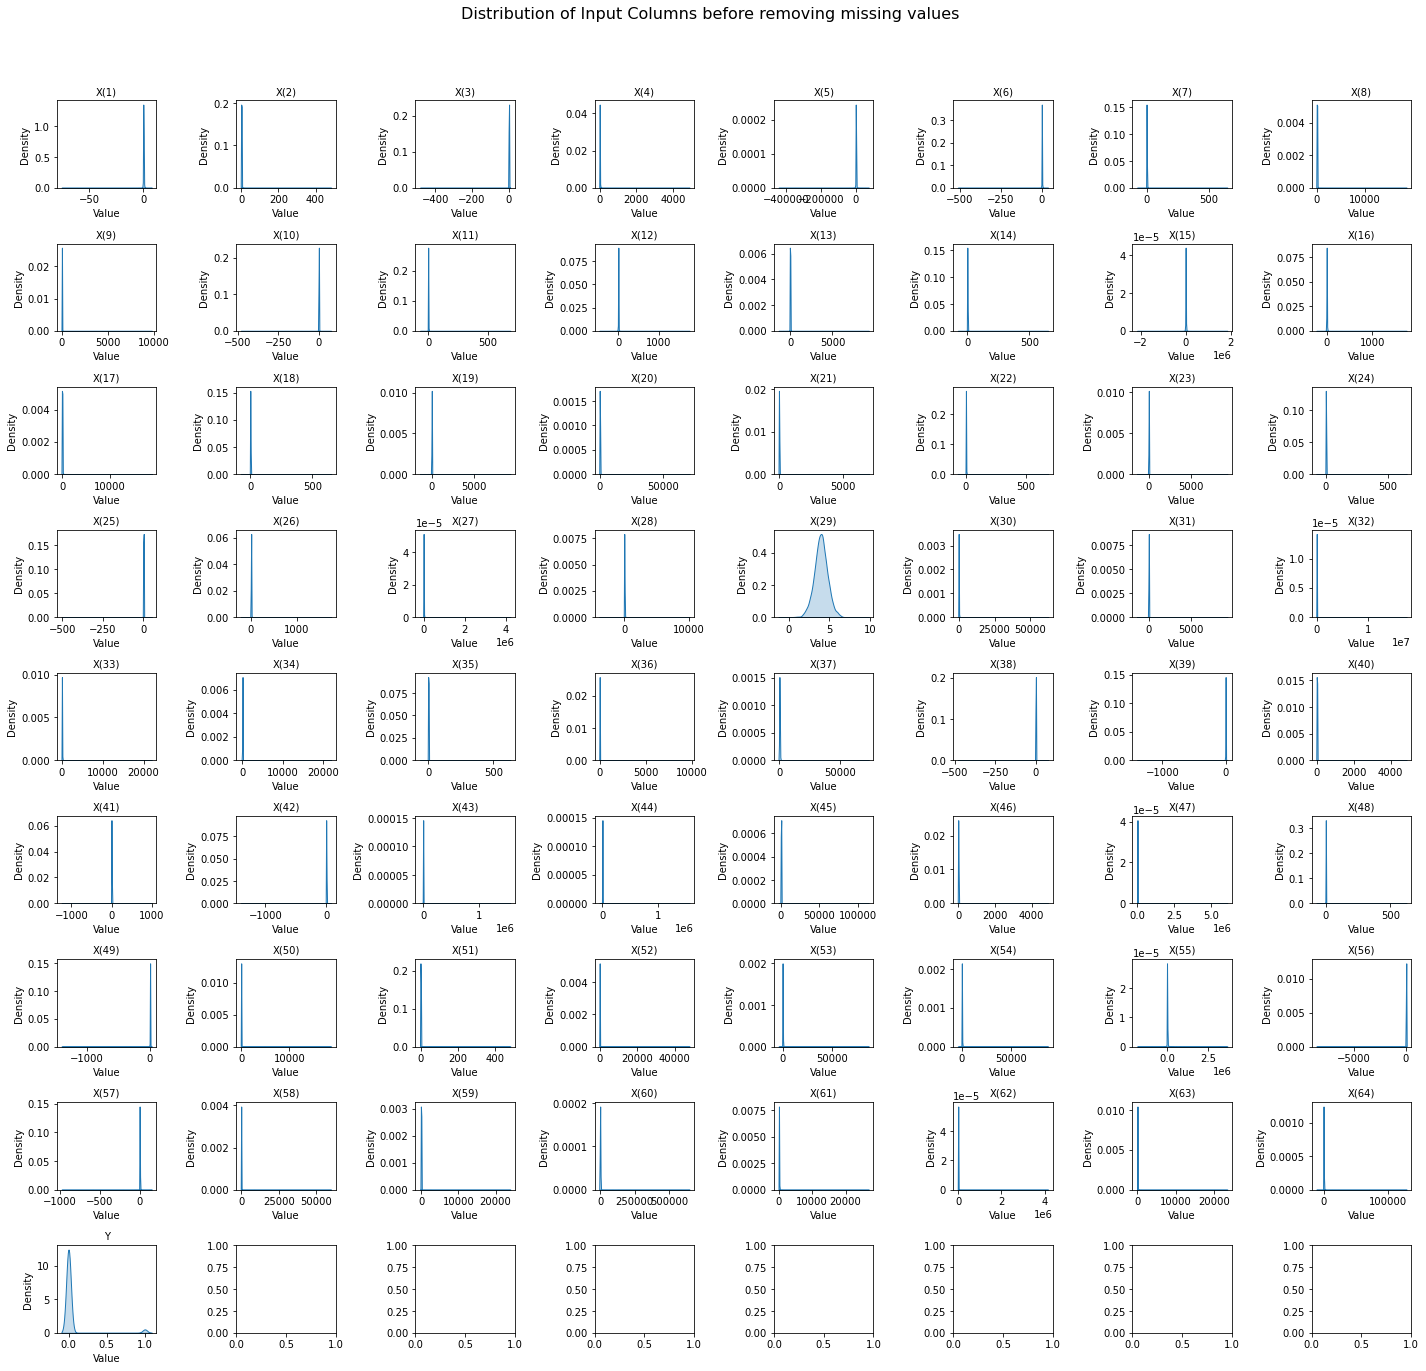

In [20]:
# Calculate the number of rows and columns for the subplot grid
num_cols = 8
num_features = len(df.columns)
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division to ensure all features are included

# Create subplots to display density plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.suptitle('Distribution of Input Columns before removing missing values', fontsize=16)

# Iterate through each column and create density plots
for i, column in enumerate(df.columns):
    row_num = i // num_cols
    col_num = i % num_cols
    ax = axes[row_num, col_num]
    
    # Plot density plot for the column
    sns.kdeplot(data=df[column], ax=ax, fill=True)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjust layout and spacing of subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

In [21]:
import pandas as pd
from sklearn.impute import SimpleImputer

def fill_missing_values(dataset):
    Y = None 
    if Y in dataset.columns:
        target = dataset[Y]
        features = dataset.drop(columns=[Y])
    else:
        features = dataset
    
    # Initialize the imputer with median
    imputer = SimpleImputer(strategy='median')
    
    # Fit and transform the features using the imputer
    filled_features = imputer.fit_transform(features)
    
    # Convert the filled features back to a DataFrame
    filled_features_df = pd.DataFrame(filled_features, columns=features.columns)
    
    # Concatenate target variable back
    if Y in dataset.columns:
        filled_features_df[Y] = target
    
    return filled_features_df

df = fill_missing_values(df)


In [22]:
# Checking again just to make sure that whether data contain missing values or not.

total_cells = np.product(df.shape)
missing_values_count = df.isnull().sum()
total_missing = missing_values_count.sum()

percent_missing = (total_missing / total_cells) * 100
print('Percentage of data that is missing in entire dataset :', percent_missing, '% .')

Percentage of data that is missing in entire dataset : 0.0 % .


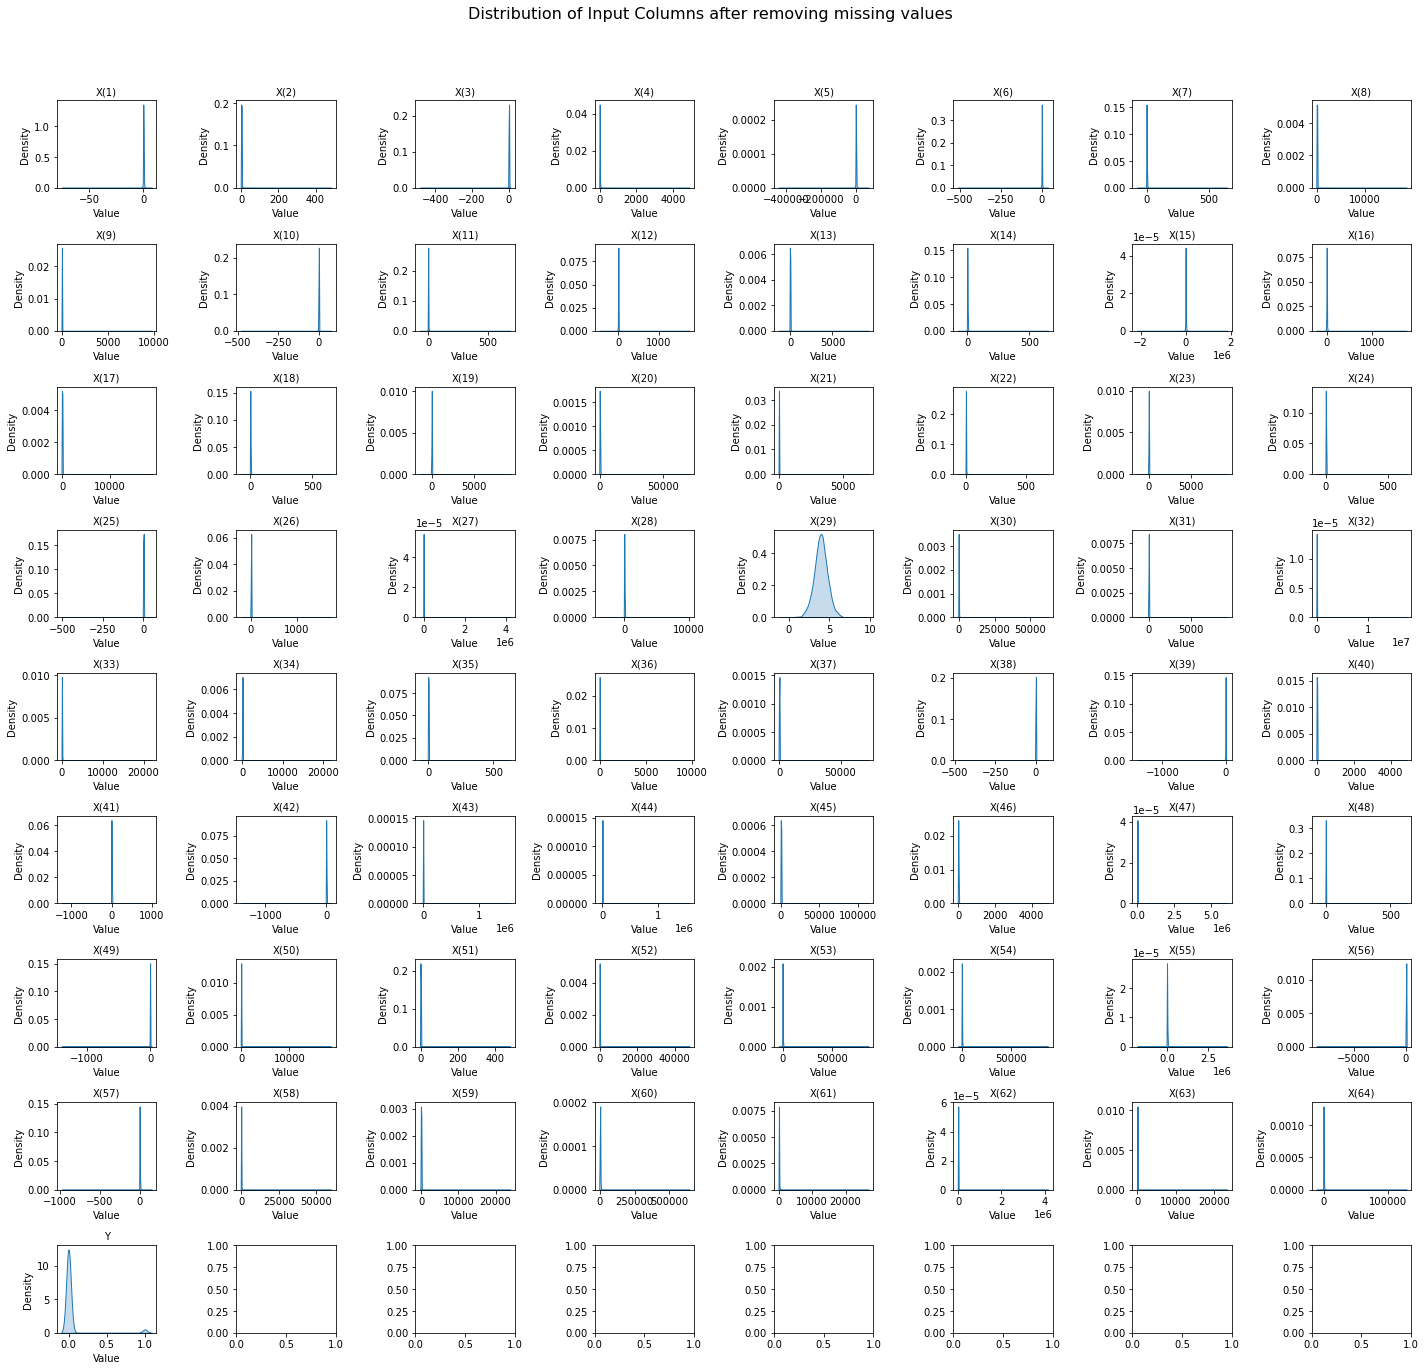

In [23]:
# Number of rows and columns for the subplot grid
num_cols = 8
num_features = len(df.columns)
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division to ensure all features are included

# Creating subplots to display density plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.suptitle('Distribution of Input Columns after removing missing values', fontsize=16)

# Iterating through each column and create density plots
for i, column in enumerate(df.columns):
    row_num = i // num_cols
    col_num = i % num_cols
    ax = axes[row_num, col_num]
    
    # Plot density plot for the column
    sns.kdeplot(data=df[column], ax=ax, fill=True)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjusting layout and spacing of subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

## Dealing with Outliers

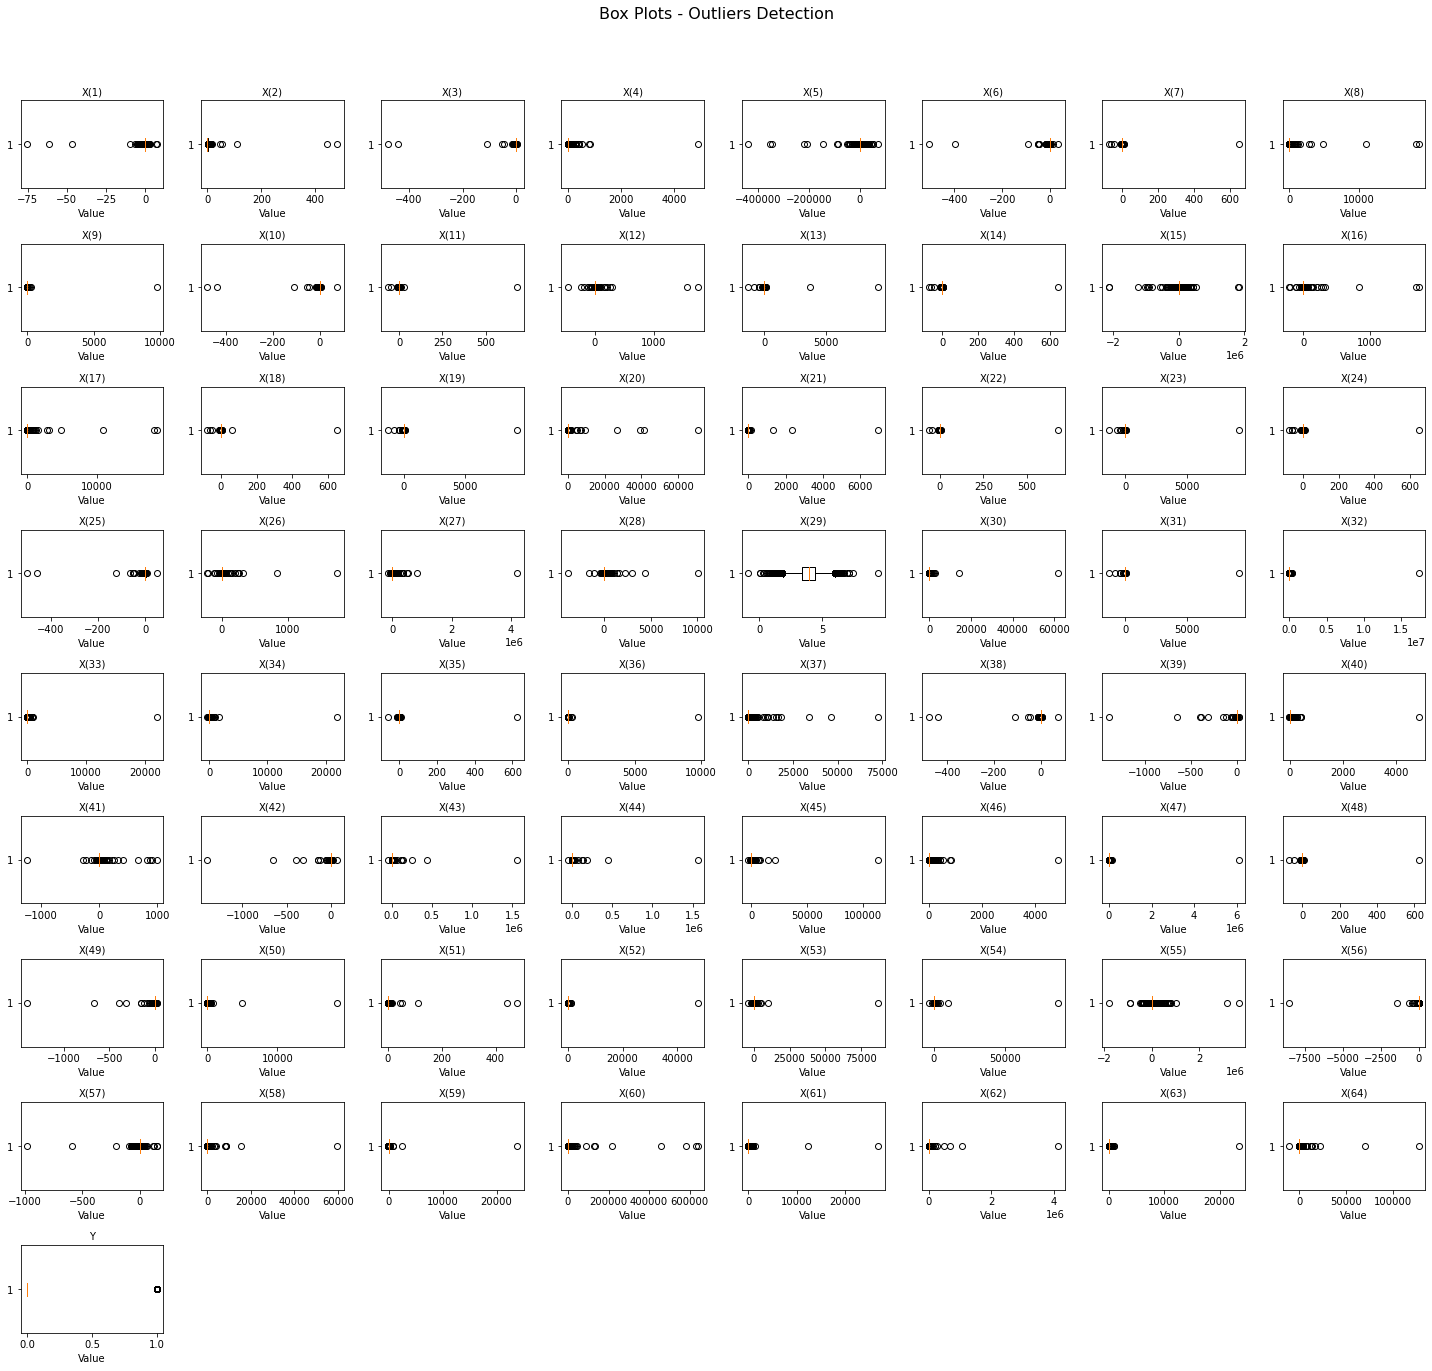

In [24]:
# Creating subplots to display box plots
num_cols =  8  
num_features = len(df.columns)
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division to ensure all features are included

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.suptitle('Box Plots - Outliers Detection', fontsize=16)

# Iterating through each column and create box plots
for i, column in enumerate(df.columns):
    row_num = i // num_cols
    col_num = i % num_cols
    ax = axes[row_num, col_num]
    
    # Plot box plot for the column
    ax.boxplot(df[column], vert=False)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('Value')
    
# Hiding empty subplots
for i in range(num_features, num_cols * num_rows):
    row_num = i // num_cols
    col_num = i % num_cols
    axes[row_num, col_num].axis('off')

# Adjusting layout and spacing of subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

In [25]:
import pandas as pd

def handle_outliers_iqr(df, target_col='Y', lower_limit=1.5, upper_limit=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for each column
    lower_bound = Q1 - lower_limit * IQR
    upper_bound = Q3 + upper_limit * IQR

    # Treat the outliers in each column
    for col in df.columns:
        if col != target_col:
            df[col] = df[col].apply(lambda x: lower_bound[col] if x < lower_bound[col] else x)
            df[col] = df[col].apply(lambda x: upper_bound[col] if x > upper_bound[col] else x)

    return df

# Call the function to handle outliers in the DataFrame
df = handle_outliers_iqr(df)


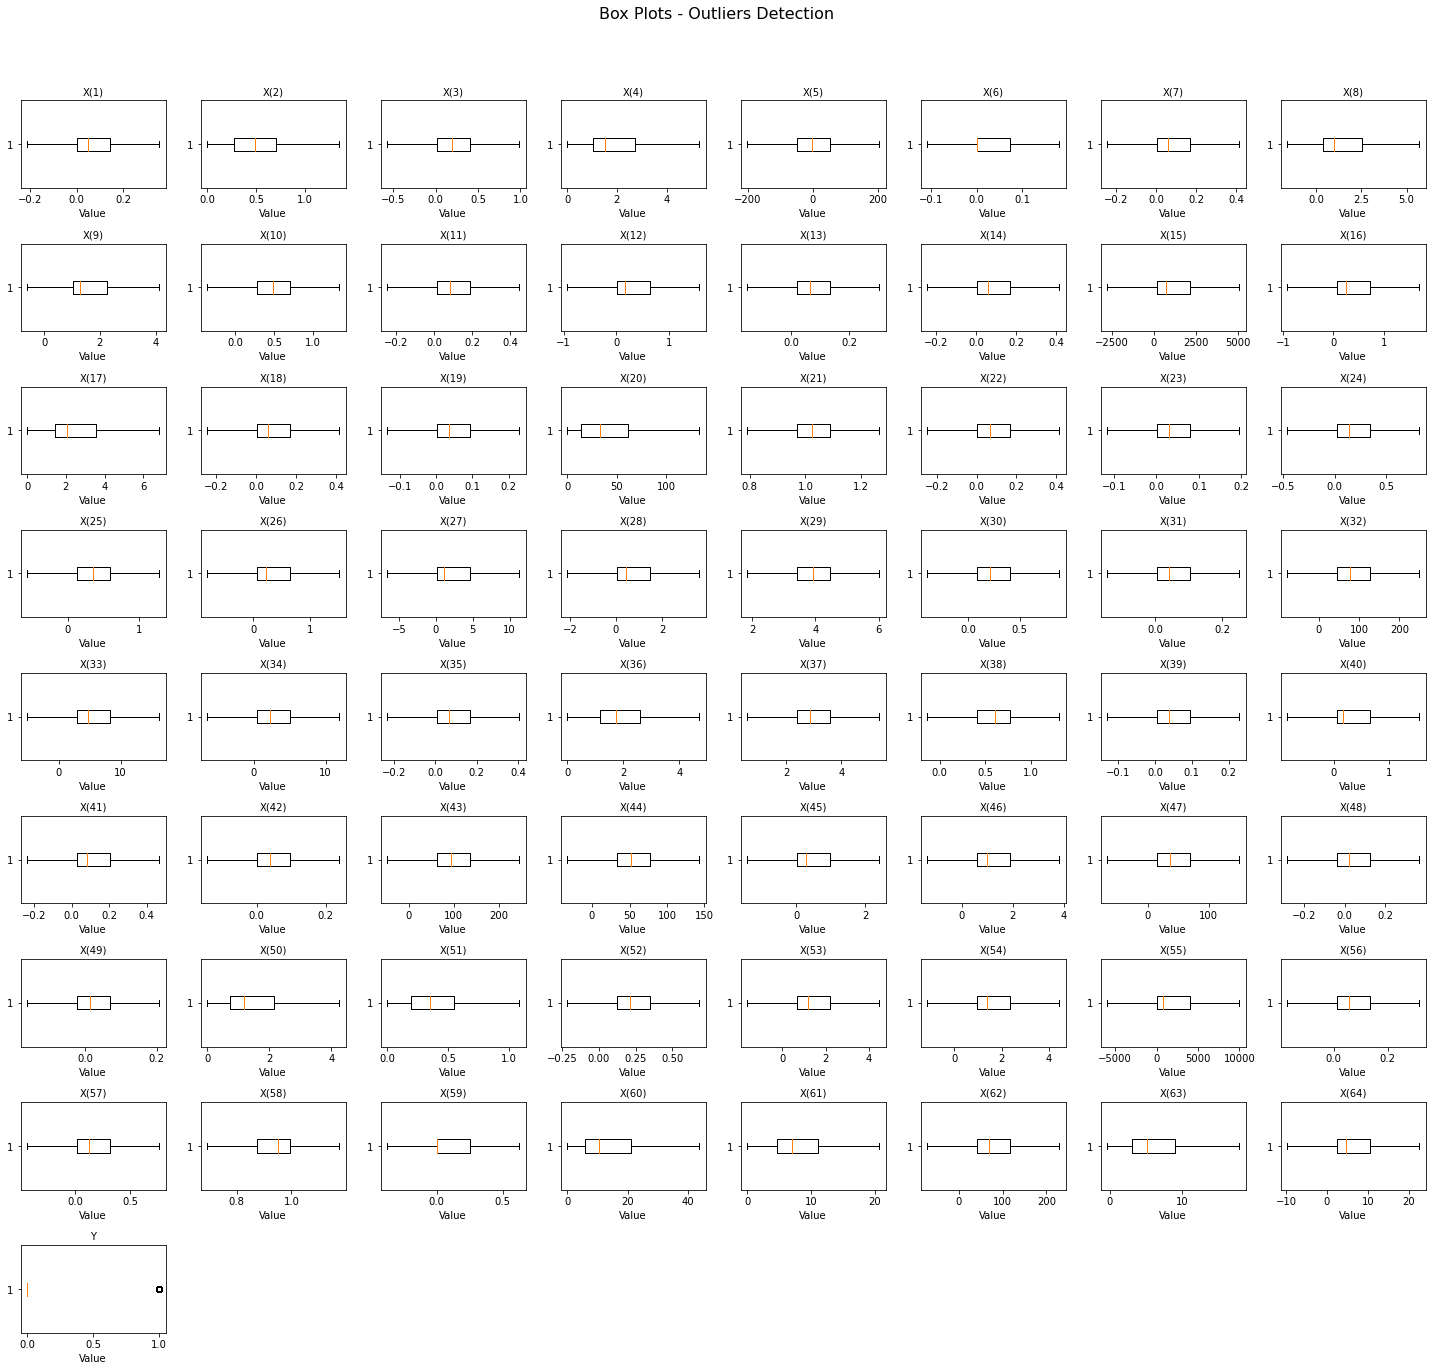

In [26]:
# Creating subplots to display box plots
num_cols =  8  
num_features = len(df.columns)
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division to ensure all features are included

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.suptitle('Box Plots - Outliers Detection', fontsize=16)

# Iterating through each column and create box plots
for i, column in enumerate(df.columns):
    row_num = i // num_cols
    col_num = i % num_cols
    ax = axes[row_num, col_num]
    
    # Plot box plot for the column
    ax.boxplot(df[column], vert=False)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('Value')
    
# Hiding empty subplots
for i in range(num_features, num_cols * num_rows):
    row_num = i // num_cols
    col_num = i % num_cols
    axes[row_num, col_num].axis('off')

# Adjusting layout and spacing of subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

In [27]:
df.to_csv(r'df2.csv', index=False)